# Week 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### Exercise 1

In [3]:
FILENAME = 'crime.csv'
CATEGORY_COL='Category'
OCCURENCE_COL='Occurences'

In [4]:
data = pd.read_csv(FILENAME)
data

,PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,...,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
0,4133422003074,41334220,3074,ROBBERY,"ROBBERY, BODILY FORCE",Monday,11/22/2004,17:50,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5118535807021,51185358,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,10/18/2005,20:00,PARK,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4018830907021,40188309,7021,VEHICLE THEFT,STOLEN AUTOMOBILE,Sunday,02/15/2004,02:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11014543126030,110145431,26030,ARSON,ARSON,Friday,02/18/2011,05:27,INGLESIDE,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,94.0
4,10108108004134,101081080,4134,ASSAULT,BATTERY,Sunday,11/21/2010,17:00,SOUTHERN,NONE,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129520,17050730416710,170507304,16710,DRUG/NARCOTIC,POSSESSION OF NARCOTICS PARAPHERNALIA,Thursday,06/22/2017,01:42,CENTRAL,"ARREST, CITED",...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,77.0
2129521,17071435504014,170714355,4014,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,09/01/2017,17:00,PARK,NONE,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,112.0
2129522,17053348465010,170533484,65010,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Friday,06/30/2017,17:50,BAYVIEW,"ARREST, BOOKED",...,NaN,NaN,22.0,NaN,1.0,NaN,NaN,NaN,NaN,56.0
2129523,17102776330130,171027763,30130,OTHER OFFENSES,PEDDLING WITHOUT A LICENSE,Wednesday,12/20/2017,15:41,SOUTHERN,"ARREST, BOOKED",...,3.0,1.0,3.0,7.0,2.0,1.0,1.0,1.0,35.0,21.0


In [5]:
total = data.shape[0]
total

2129525

In [6]:
categories = pd.unique(data[CATEGORY_COL])
categories

array(['ROBBERY', 'VEHICLE THEFT', 'ARSON', 'ASSAULT', 'TRESPASS',
       'BURGLARY', 'LARCENY/THEFT', 'WARRANTS', 'OTHER OFFENSES',
       'DRUG/NARCOTIC', 'SUSPICIOUS OCC', 'LIQUOR LAWS', 'VANDALISM',
       'WEAPON LAWS', 'NON-CRIMINAL', 'MISSING PERSON', 'FRAUD',
       'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'FORGERY/COUNTERFEITING',
       'PROSTITUTION', 'DRUNKENNESS', 'BAD CHECKS',
       'DRIVING UNDER THE INFLUENCE', 'LOITERING', 'STOLEN PROPERTY',
       'SUICIDE', 'BRIBERY', 'EXTORTION', 'EMBEZZLEMENT', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'SEX OFFENSES, NON FORCIBLE', 'TREA'],
      dtype=object)

In [7]:
categories.size

37

In [8]:
# counting total crime per category into a dict
crimesByCategory = {}

for category in categories:
    crimeNo = data[data.Category == category].shape[0]
    crimesByCategory[category] = crimeNo

crimesByCategory

{'ROBBERY': 54467,
 'VEHICLE THEFT': 126228,
 'ARSON': 3875,
 'ASSAULT': 167042,
 'TRESPASS': 19194,
 'BURGLARY': 91067,
 'LARCENY/THEFT': 477975,
 'WARRANTS': 99821,
 'OTHER OFFENSES': 301874,
 'DRUG/NARCOTIC': 117821,
 'SUSPICIOUS OCC': 79087,
 'LIQUOR LAWS': 2840,
 'VANDALISM': 114718,
 'WEAPON LAWS': 21004,
 'NON-CRIMINAL': 236928,
 'MISSING PERSON': 44268,
 'FRAUD': 41348,
 'SEX OFFENSES, FORCIBLE': 8747,
 'SECONDARY CODES': 22378,
 'DISORDERLY CONDUCT': 9932,
 'RECOVERED VEHICLE': 8688,
 'KIDNAPPING': 4282,
 'FORGERY/COUNTERFEITING': 22995,
 'PROSTITUTION': 16501,
 'DRUNKENNESS': 9760,
 'BAD CHECKS': 924,
 'DRIVING UNDER THE INFLUENCE': 5652,
 'LOITERING': 2402,
 'STOLEN PROPERTY': 11450,
 'SUICIDE': 1291,
 'BRIBERY': 796,
 'EXTORTION': 729,
 'EMBEZZLEMENT': 2984,
 'GAMBLING': 343,
 'PORNOGRAPHY/OBSCENE MAT': 57,
 'SEX OFFENSES, NON FORCIBLE': 43,
 'TREA': 14}

### Exercise 2

In [9]:
# converting dictionary to DataFrame to be able to order it
categorizedDf = pd.DataFrame(crimesByCategory.items(), columns=[CATEGORY_COL, OCCURENCE_COL])
categorizedDf.sort_values(by=[OCCURENCE_COL], ascending=False, inplace=True)
categorizedDf

,Category,Occurences
6,LARCENY/THEFT,477975
8,OTHER OFFENSES,301874
14,NON-CRIMINAL,236928
3,ASSAULT,167042
1,VEHICLE THEFT,126228
9,DRUG/NARCOTIC,117821
12,VANDALISM,114718
7,WARRANTS,99821
5,BURGLARY,91067
10,SUSPICIOUS OCC,79087


<AxesSubplot:title={'center':'Crime occurences by category'}, xlabel='Category'>

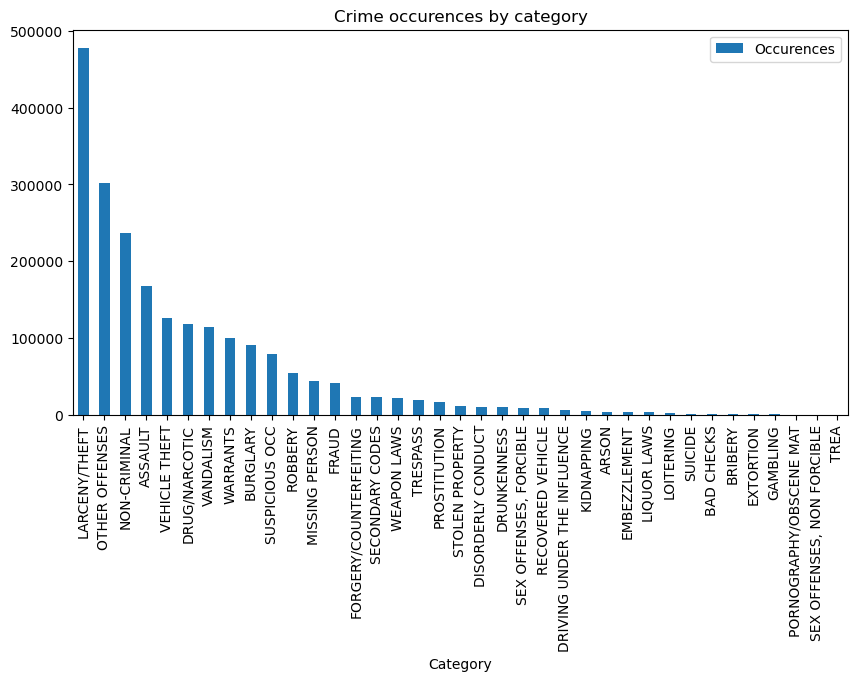

In [10]:
title = "Crime occurences by category"
categorizedDf.plot.bar(x=CATEGORY_COL, y=OCCURENCE_COL, figsize=(10,5), title=title)

In [11]:
#categories = list(crimesByCategory.keys())
#values = list(crimesByCategory.values())
#plt.figure(figsize=(10, 5))
#plt.bar(names, values, align='center', width=0.7)
#plt.xticks(rotation='vertical')
#plt.xlabel("Categories")
#plt.ylabel("Occurrences")
#plt.title("Number of crimes per category")
#plt.show()

### Exercise 3

In [12]:
# counting crimes per year
noOfCrimesPerYear = {}
for year in range(2003,2018):
    data['Date'] = pd.to_datetime(data['Date'])
    count = data[data['Date'].dt.year == year].shape[0]
    noOfCrimesPerYear[year] = count

In [13]:
# converting to dataframe to display 
yearlyCrimesDf = pd.DataFrame(noOfCrimesPerYear.items(), columns=['Year', 'Occurences'])
yearlyCrimesDf

,Year,Occurences
0,2003,142803
1,2004,142054
2,2005,137048
3,2006,131856
4,2007,131771
5,2008,135242
6,2009,134309
7,2010,127758
8,2011,126713
9,2012,135464


<AxesSubplot:title={'center':'Crimes per year'}, xlabel='Year'>

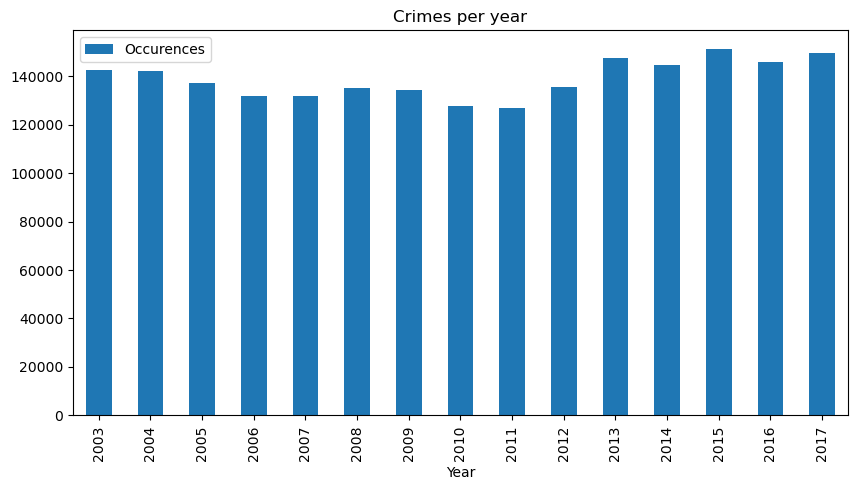

In [14]:
yearlyCrimesDf.plot.bar(x='Year', y='Occurences', figsize=(10,5), title='Crimes per year')

In [15]:
# get years with the most/least crime
mostCrime = yearlyCrimesDf.iloc[yearlyCrimesDf['Occurences'].idxmax()]
leastCrime = yearlyCrimesDf.iloc[yearlyCrimesDf['Occurences'].idxmin()]
mostCrime

Year            2015
Occurences    151459
Name: 12, dtype: int64

In [16]:
leastCrime

Year            2011
Occurences    126713
Name: 8, dtype: int64

In [17]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [18]:
categorizedYearly = {}
for category in focuscrimes:
    dict = {}
    for year in range(2003, 2018):
        # filtering data to count the crimes in the specific category per year
        temp = data.loc[data['Date'].dt.year == year]
        count = temp.loc[data['Category'] == category].shape[0]
        dict[year] = count
    # creating dataframe and adding it to dictionary labeled with the crime category
    df = pd.DataFrame(dict.items(), columns=['Year', 'Occurences'])
    categorizedYearly[category] = df
categorizedYearly

{'STOLEN PROPERTY':     Year  Occurences
 0   2003         776
 1   2004         628
 2   2005         528
 3   2006         552
 4   2007         505
 5   2008         490
 6   2009         640
 7   2010         649
 8   2011         748
 9   2012         878
 10  2013        1171
 11  2014        1058
 12  2015         927
 13  2016         861
 14  2017         782,
 'ASSAULT':     Year  Occurences
 0   2003       11409
 1   2004       10968
 2   2005       10154
 3   2006       10779
 4   2007       10900
 5   2008       11063
 6   2009       10681
 7   2010       10659
 8   2011       10589
 9   2012       10519
 10  2013       10790
 11  2014       10398
 12  2015       11090
 13  2016       11546
 14  2017       11613,
 'BURGLARY':     Year  Occurences
 0   2003        6013
 1   2004        6721
 2   2005        7051
 3   2006        6967
 4   2007        5422
 5   2008        5650
 6   2009        5366
 7   2010        4942
 8   2011        4927
 9   2012        6197
 10  2013 

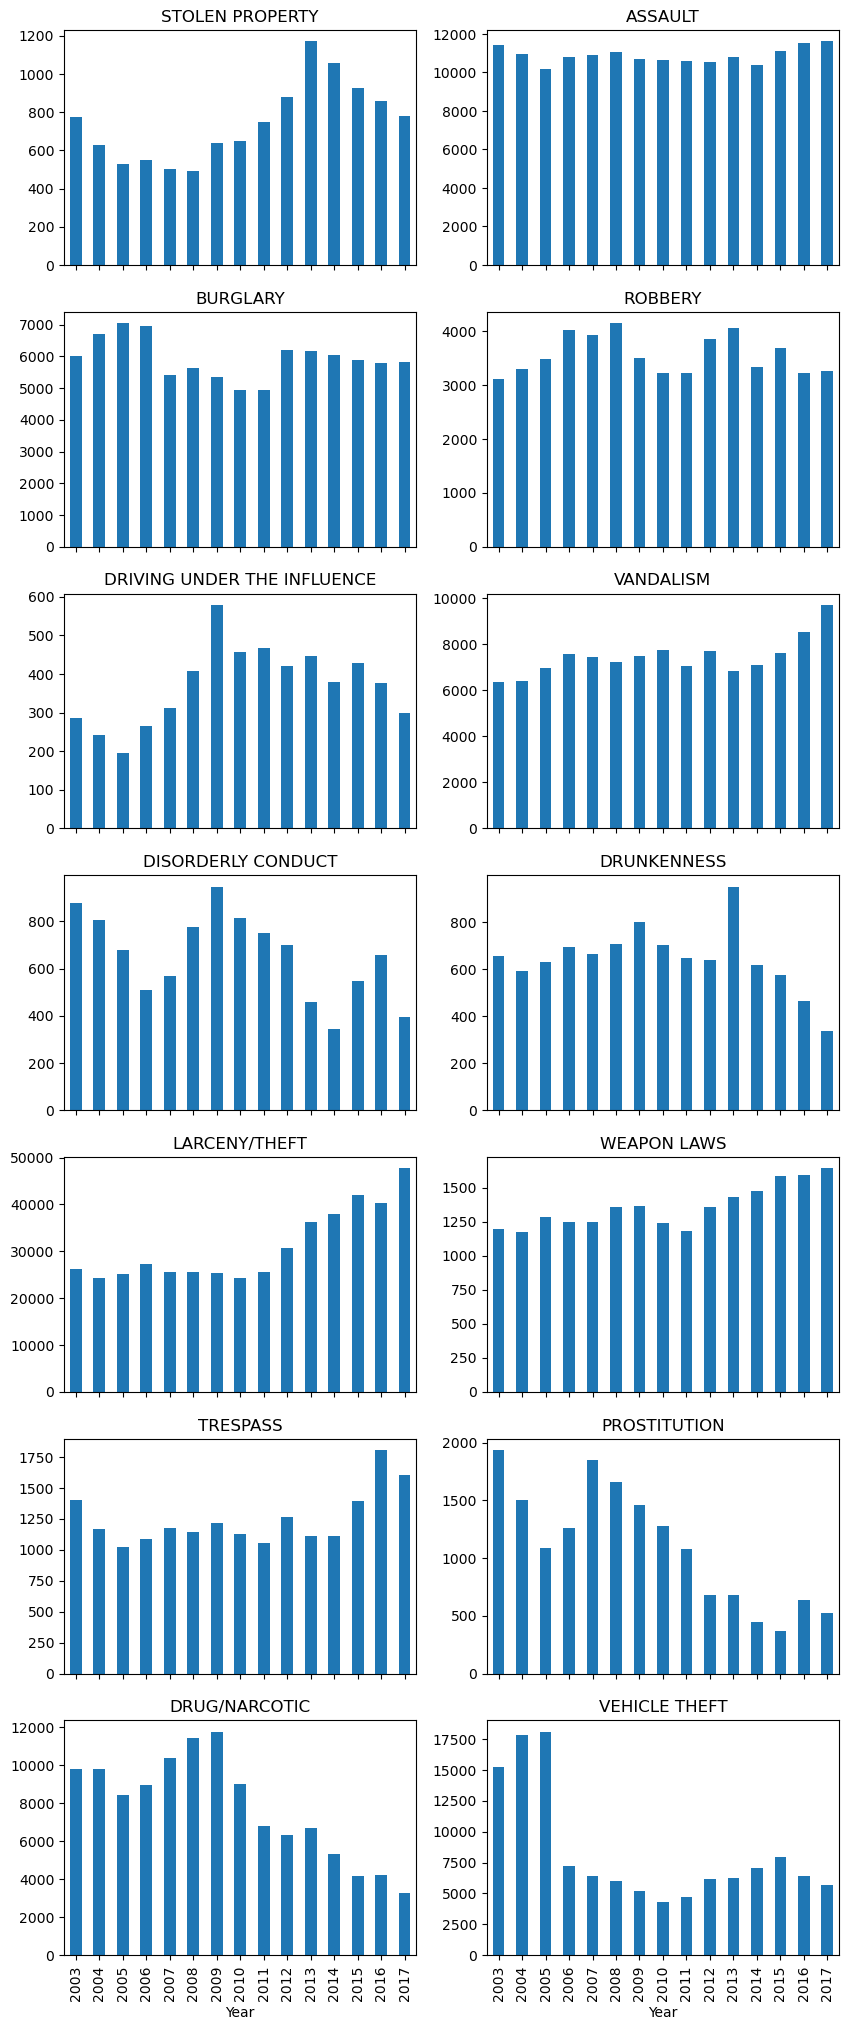

In [19]:
fig, axes = plt.subplots(nrows=7, ncols=2, sharex=True)
i = 0
for crime, df in categorizedYearly.items():
    df.plot.bar(ax=axes[i//2, i%2], x='Year', y='Occurences', title=crime, figsize=(10,25), legend=None)
    i += 1